In [1]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_healthy = r"C:\Users\gayae\Downloads\New folder\Train\Train\Healthy"
train_files_powdery = r"C:\Users\gayae\Downloads\New folder\Train\Train\Powdery"
train_files_rust =  r"C:\Users\gayae\Downloads\New folder\Train\Train\Rust"

test_files_healthy = r"C:\Users\gayae\Downloads\New folder\Test\Test\Healthy"
test_files_powdery = r"C:\Users\gayae\Downloads\New folder\Test\Test\Powdery"
test_files_rust =  r"C:\Users\gayae\Downloads\New folder\Test\Test\Rust"

valid_files_healthy = r"C:\Users\gayae\Downloads\New folder\Validation\Validation\Healthy"
valid_files_powdery = r"C:\Users\gayae\Downloads\New folder\Validation\Validation\Powdery"
valid_files_rust = r"C:\Users\gayae\Downloads\New folder\Validation\Validation\Rust"

print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_powdery))
print("Number of rusty leaf images in training set", total_files(train_files_rust))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_powdery))
print("Number of rusty leaf images in test set", total_files(test_files_rust))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_files_rust))

Number of healthy leaf images in training set 458
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434
Number of healthy leaf images in test set 50
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 50
Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20


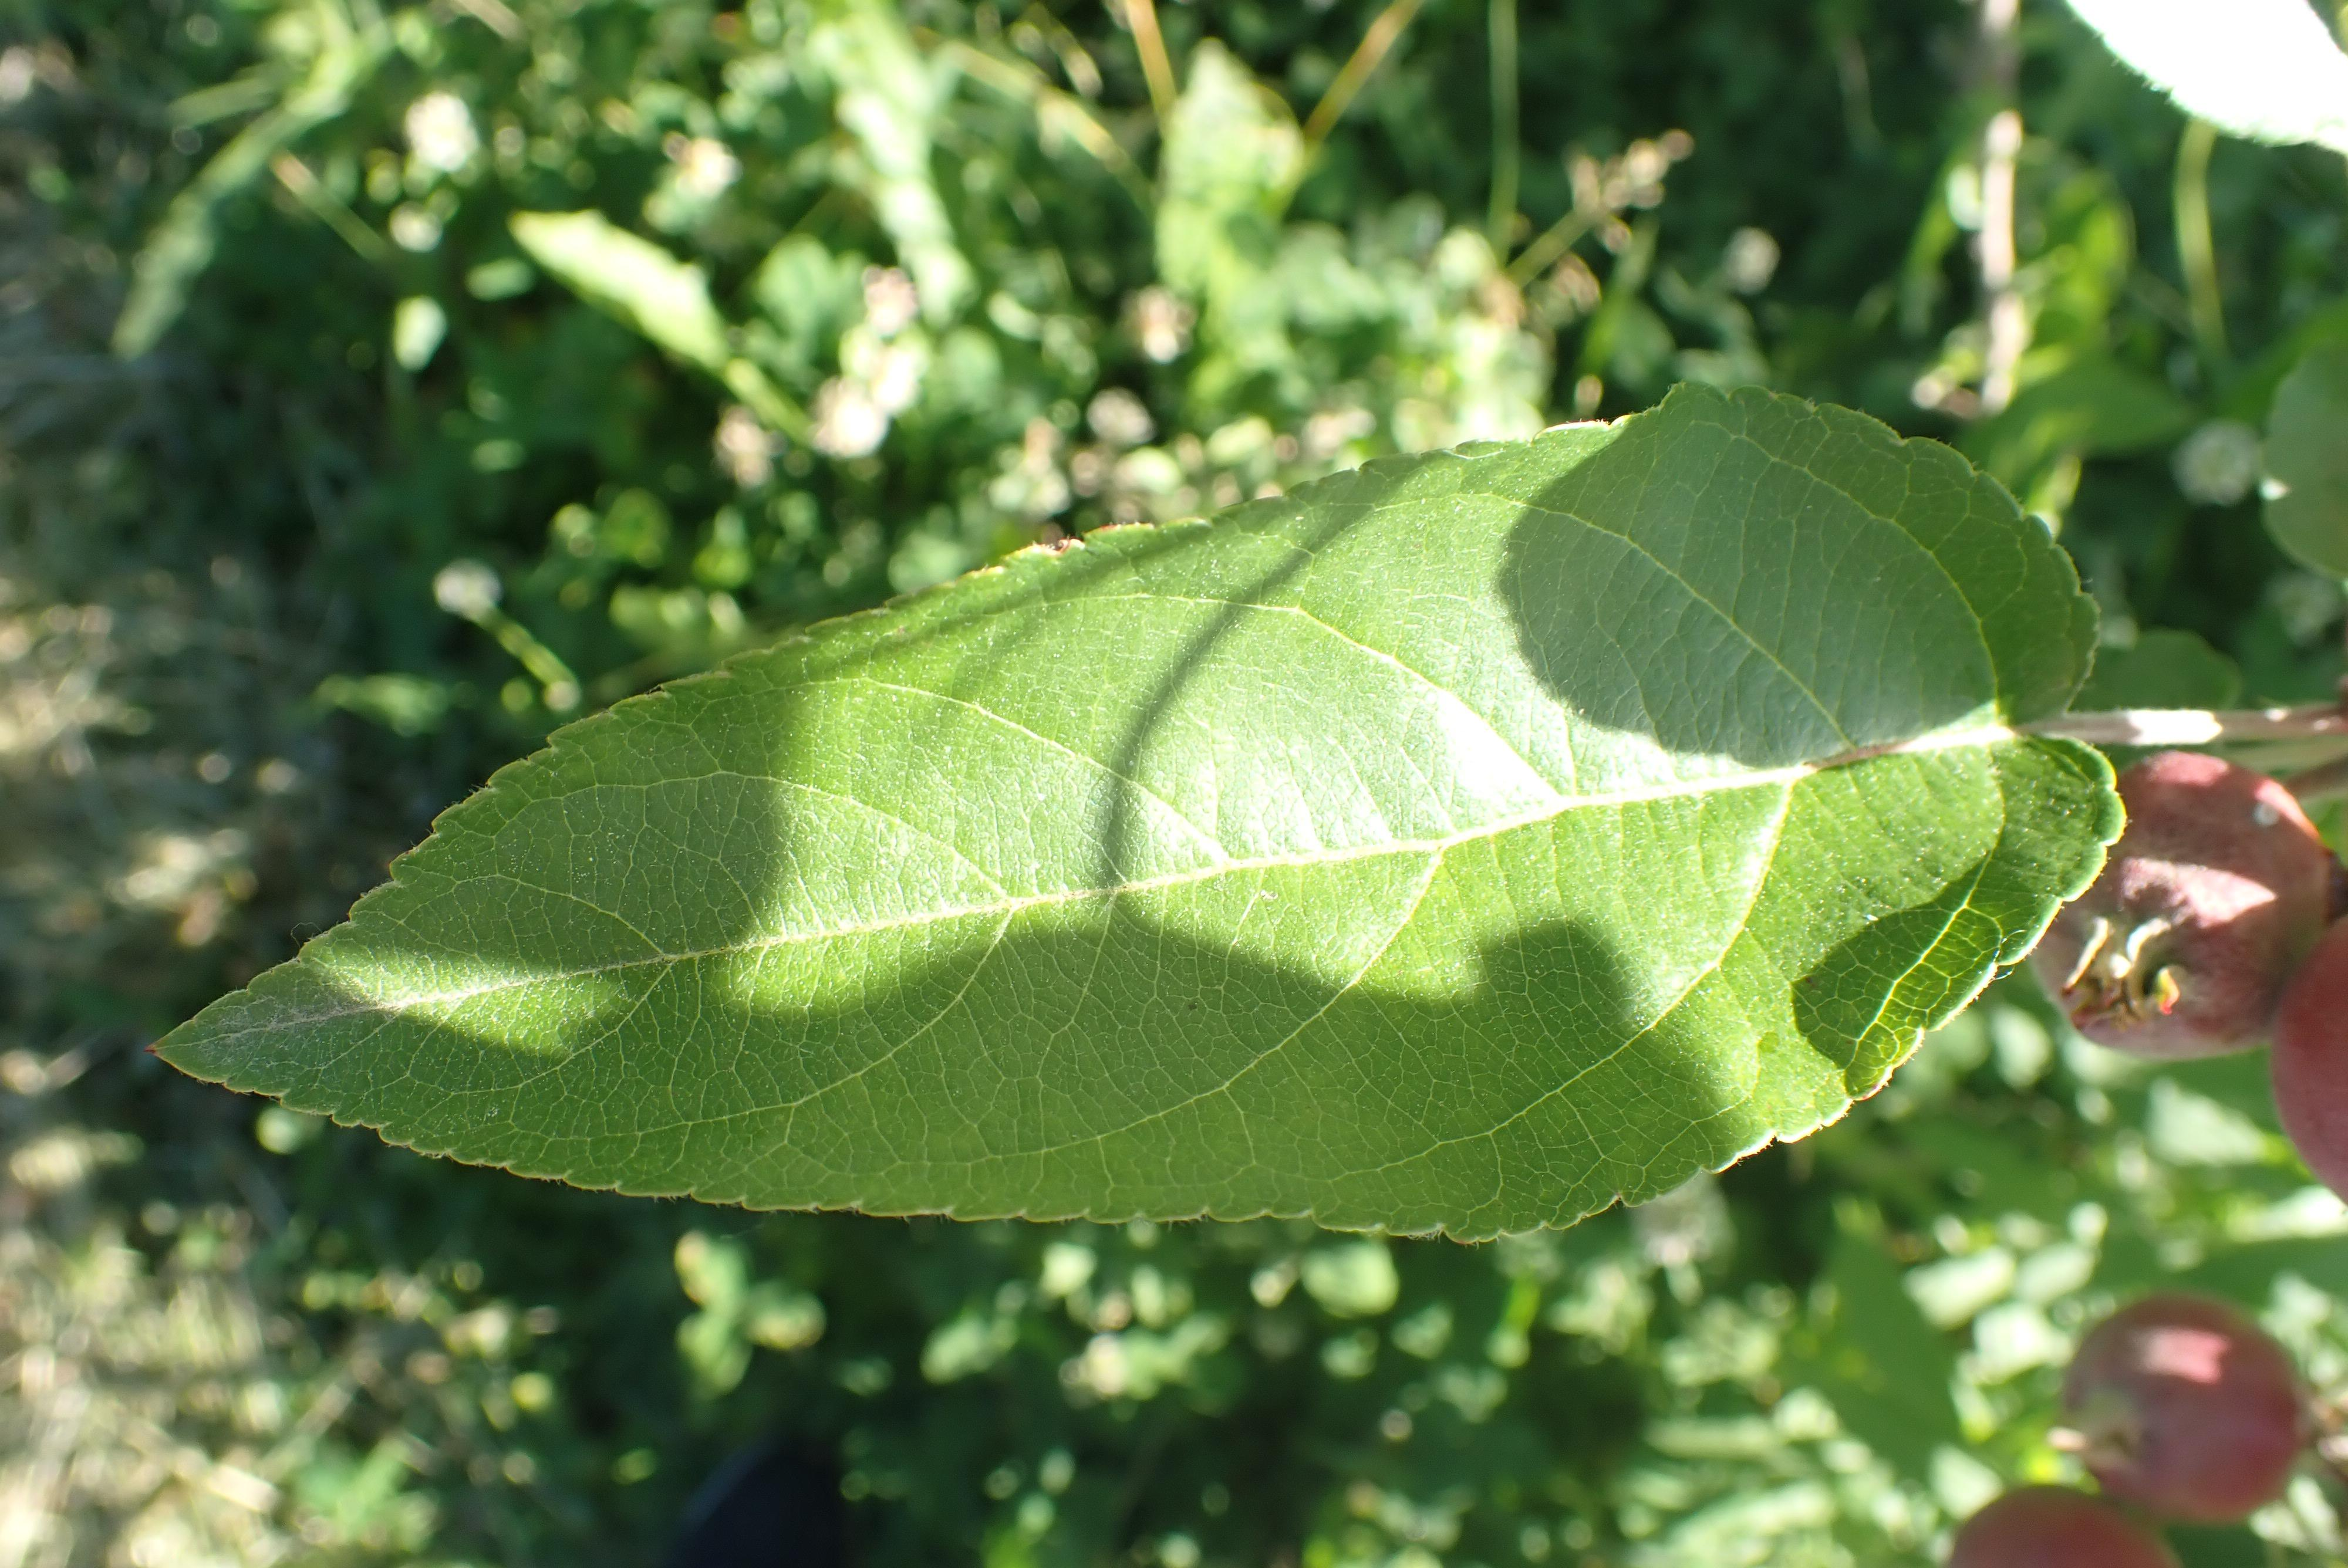

In [2]:
from PIL import Image
import IPython.display as display

image_path = r"C:\Users\gayae\Downloads\New folder\Train\Train\Healthy\9fcb68a0fc2a60ae.jpg"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

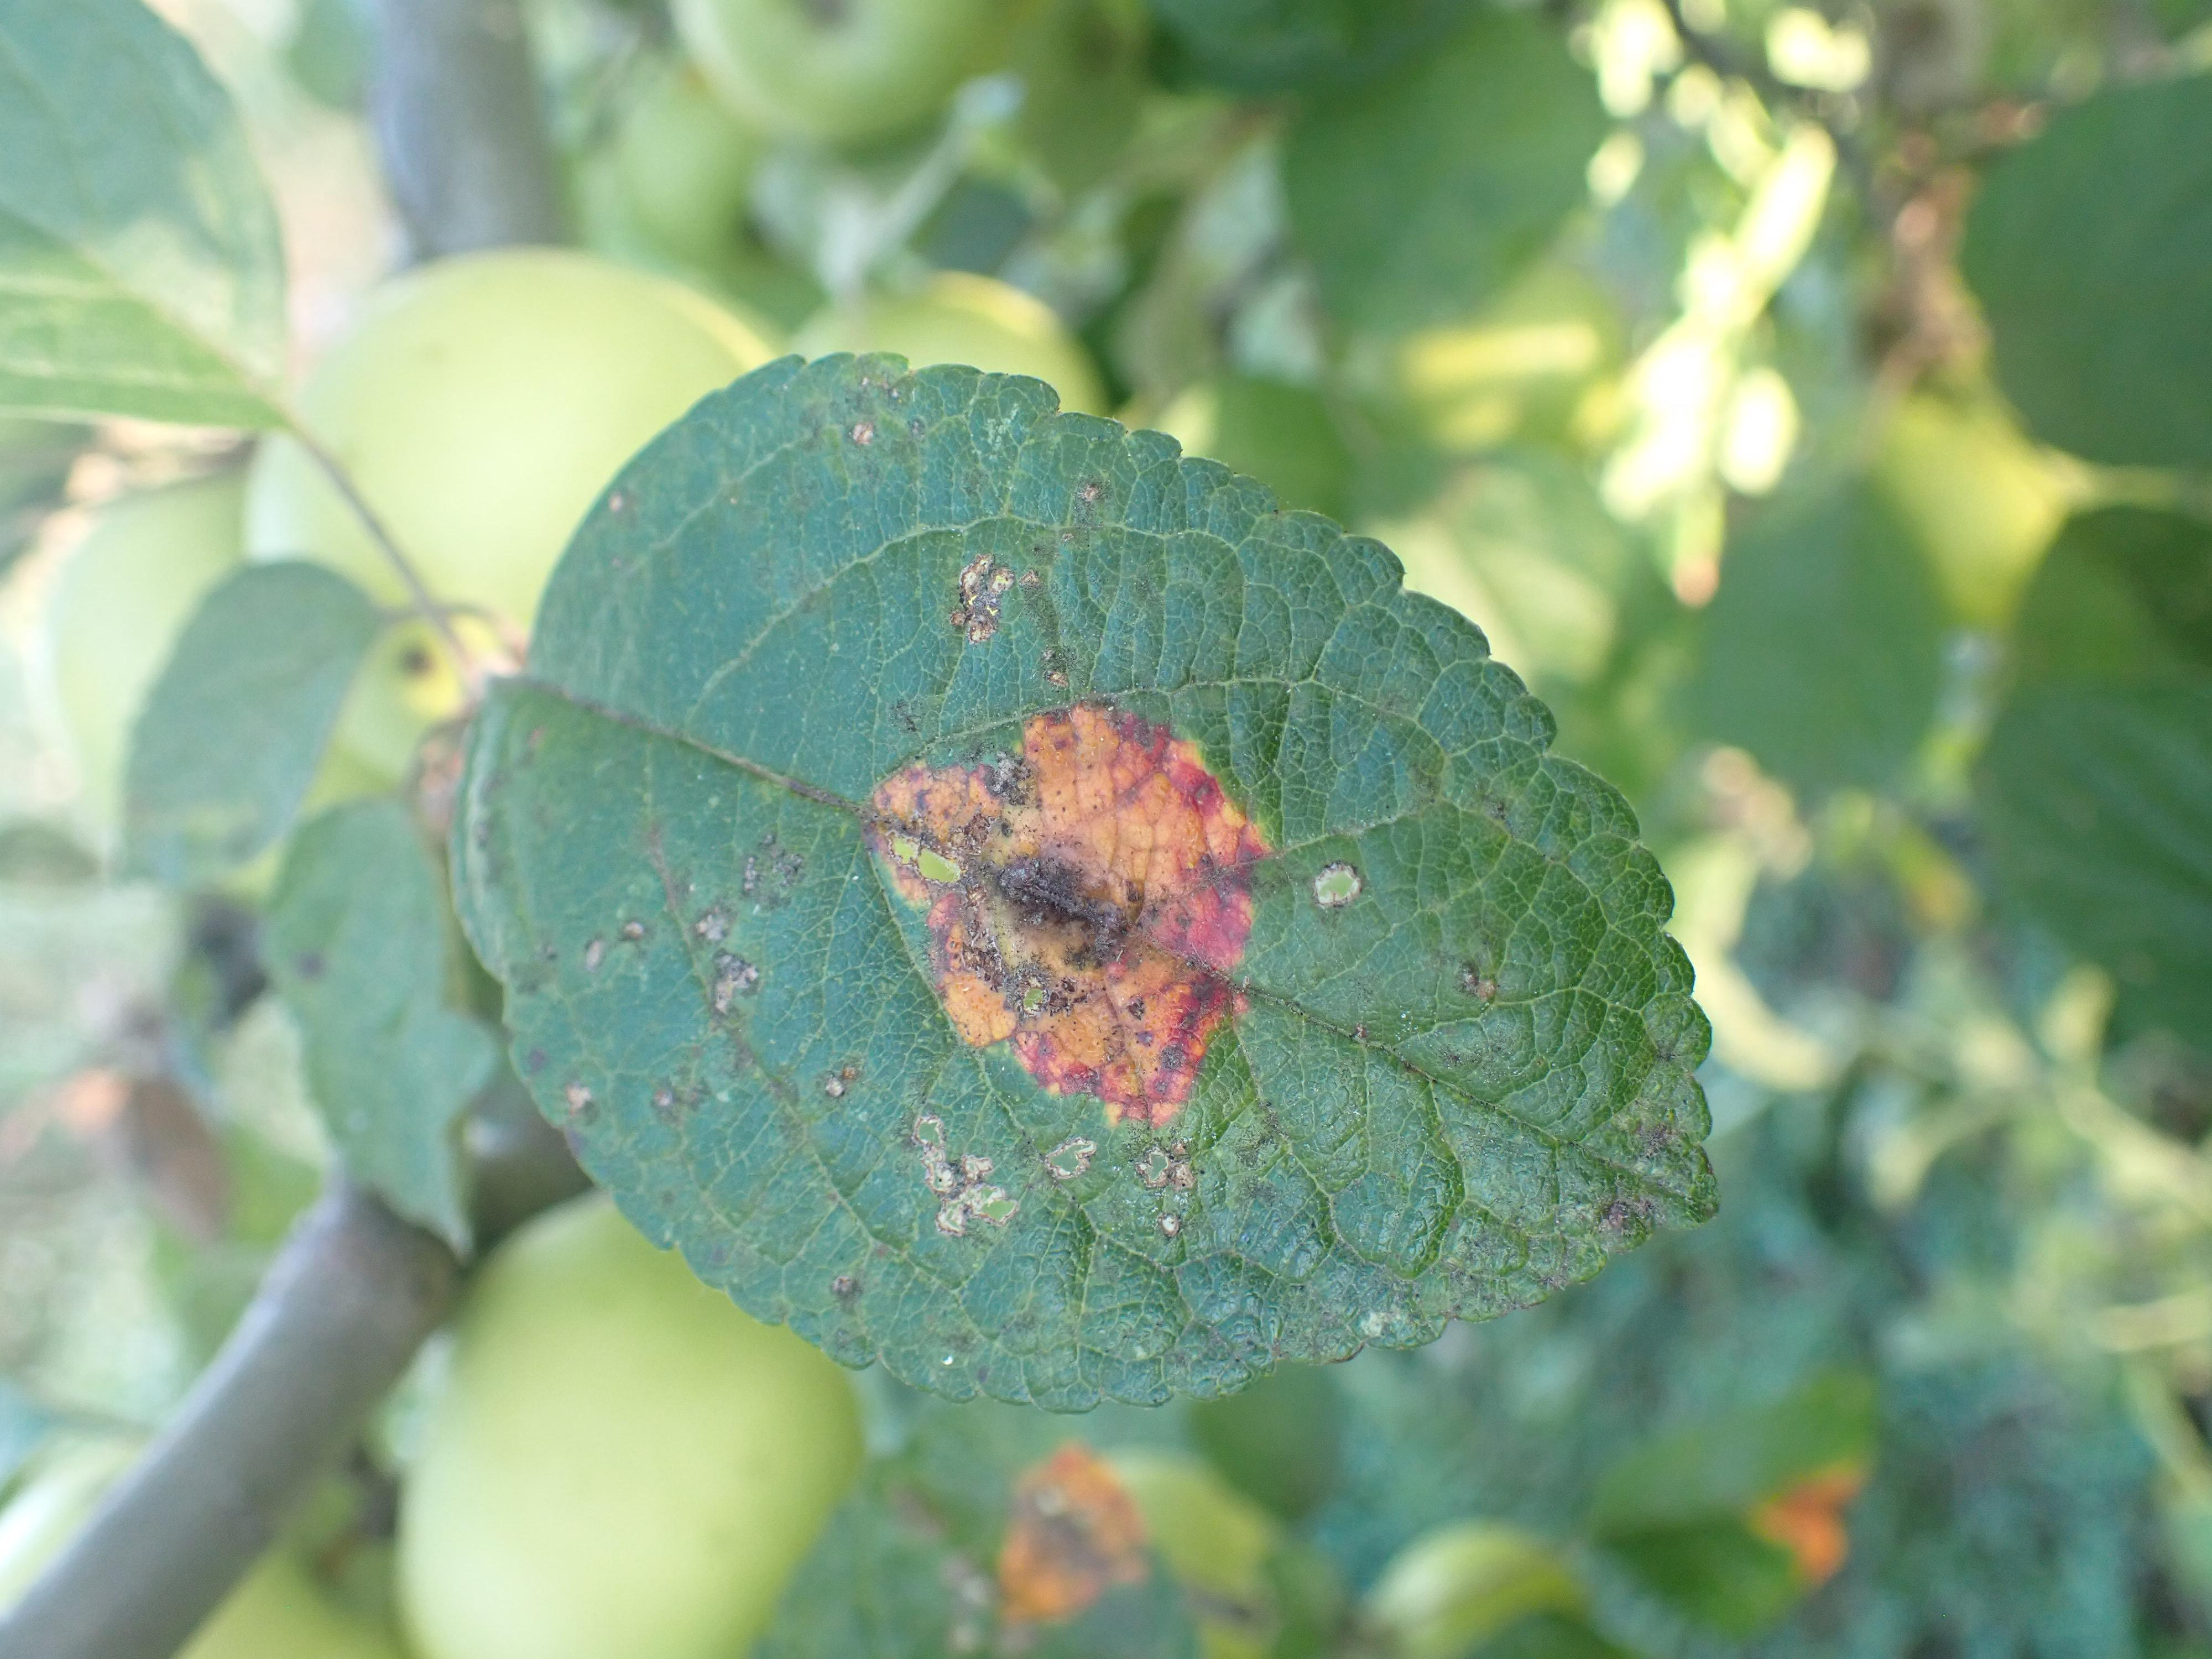

In [3]:
image_path = r"C:\Users\gayae\Downloads\New folder\Train\Train\Rust\f5f4c32c4d2e20a7.jpg"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [4]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(r"C:\Users\gayae\Downloads\New folder\Train\Train",
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(r"C:\Users\gayae\Downloads\New folder\Validation\Validation",
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(train_generator,
                    batch_size=64,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_batch_size=64
                    )

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 195s 4s/step - accuracy: 0.4067 - loss: 2.9570 - val_accuracy: 0.8000 - val_loss: 0.5777
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 185s 4s/step - accuracy: 0.8014 - loss: 0.5098 - val_accuracy: 0.8333 - val_loss: 0.4472
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 192s 4s/step - accuracy: 0.8896 - loss: 0.3138 - val_accuracy: 0.7833 - val_loss: 0.4820
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 197s 4s/step - accuracy: 0.9220 - loss: 0.2276 - val_accuracy: 0.8667 - val_loss: 0.4019
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 193s 4s/step - accuracy: 0.9199 - loss: 0.2680 - val_accuracy: 0.8500 - val_loss: 0.4465
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 232s 5s/step - accuracy: 0.9258 - loss: 0.2125 - val_accuracy: 0.8833 - val_loss: 0.3378
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 249s 5s/step - accuracy: 0.9212 - loss: 0.2319 - val_accuracy: 0.8167 - val_loss: 0.3980
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 212s 4s/step - accuracy: 0.9381 - loss: 0.1801 - val_accuracy: 0.8667 - v

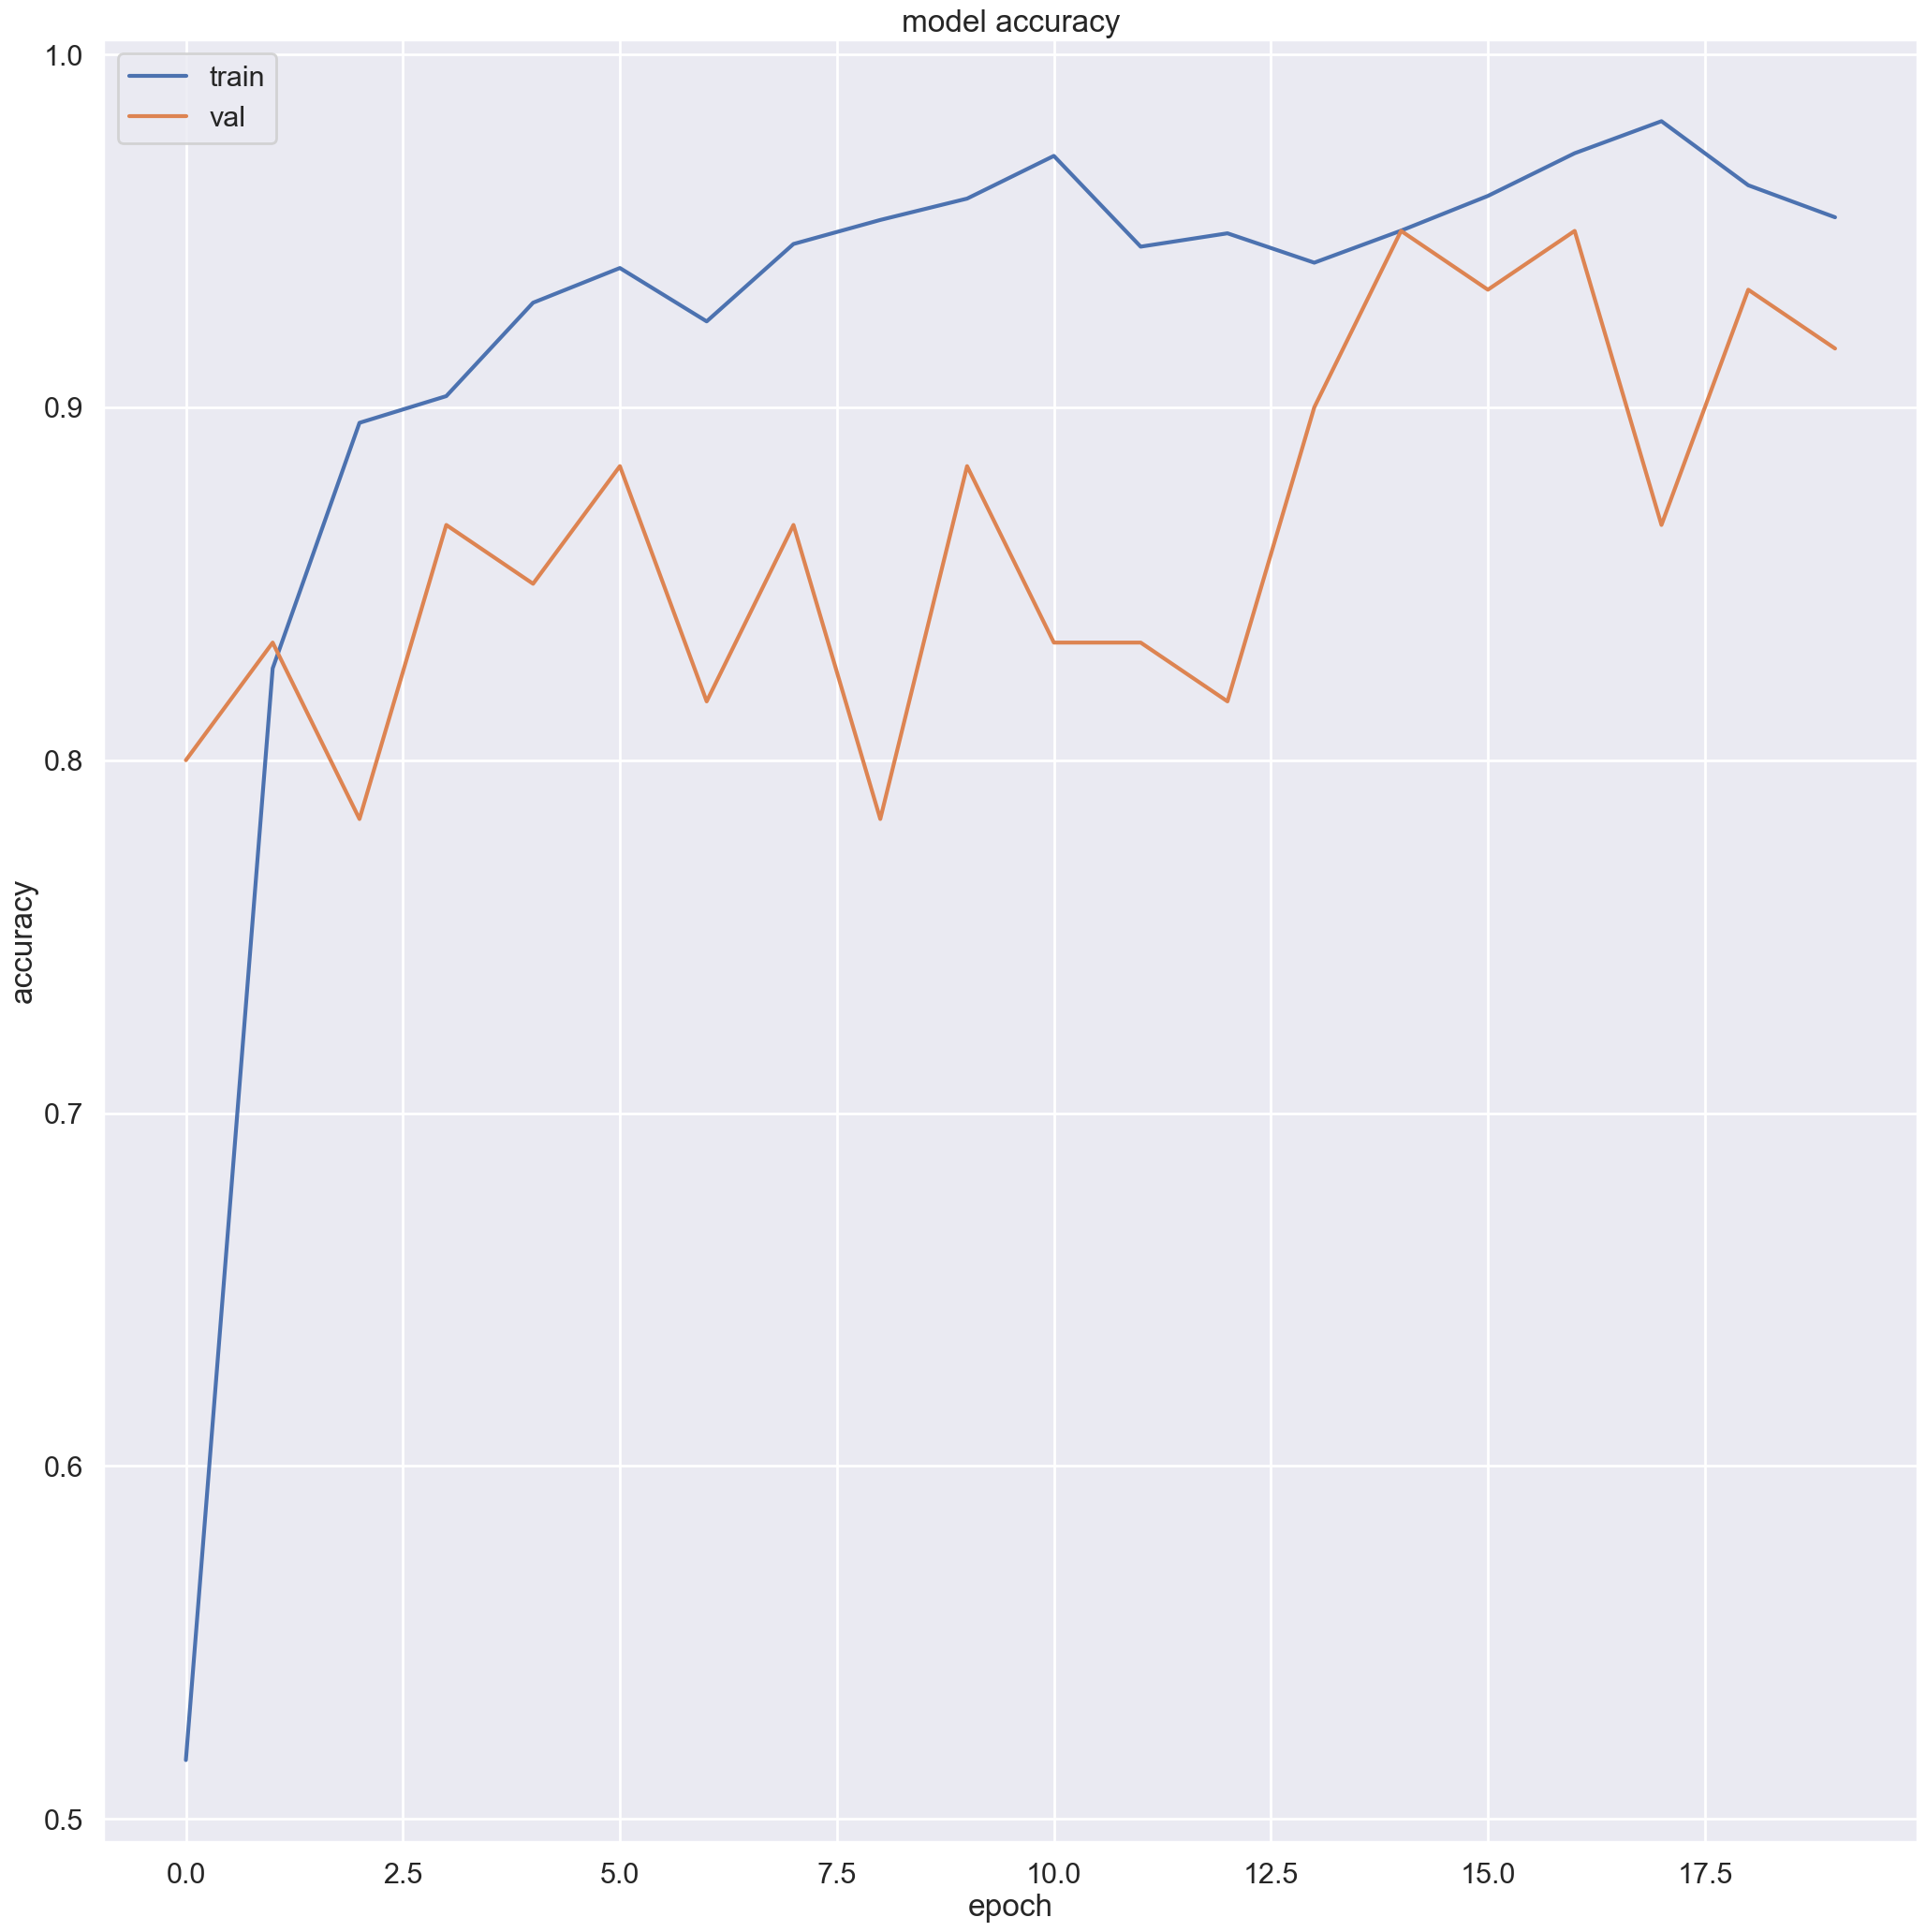

In [27]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
model.save("model.h5")

In [29]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image(r"C:\Users\gayae\Downloads\New folder\Test\Test\Rust\91f6c89ade1cd60a.jpg")

In [30]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


array([0.00136433, 0.00351395, 0.99512166], dtype=float32)

In [31]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [32]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define Mish activation function
def mish(x):
    return x * tf.math.tanh(tf.math.softplus(x))

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Additional hidden layers
model.add(Conv2D(128, (3, 3), activation=mish))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation=mish))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation=mish))
model.add(Dense(3, activation='softmax'))

model.summary()



C:\Users\gayae\Music\anaconda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 223, 223, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,359,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,747,971 (10.48 MB)

 Trainable params: 2,747,971 (10.48 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(train_generator,
                    batch_size=64,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_batch_size=64
                    
                    )

Epoch 1/20


C:\Users\gayae\Music\anaconda\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 291s 5s/step - accuracy: 0.4792 - loss: 1.0514 - val_accuracy: 0.8000 - val_loss: 0.4617
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.8610 - loss: 0.3598 - val_accuracy: 0.8333 - val_loss: 0.4869
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 197s 4s/step - accuracy: 0.9080 - loss: 0.2908 - val_accuracy: 0.8667 - val_loss: 0.3084
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 282s 6s/step - accuracy: 0.9169 - loss: 0.2215 - val_accuracy: 0.8833 - val_loss: 0.4281
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 208s 4s/step - accuracy: 0.9406 - loss: 0.1525 - val_accuracy: 0.8500 - val_loss: 0.4078
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 204s 4s/step - accuracy: 0.9519 - loss: 0.1575 - val_accuracy: 0.8333 - val_loss: 0.4252
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 222s 5s/step - accuracy: 0.8832 - loss: 0.3404 - val_accuracy: 0.8500 - val_loss: 0.3430
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.9481 - loss: 0.1587 - val_accuracy: 0.8500 - val_loss: 0.

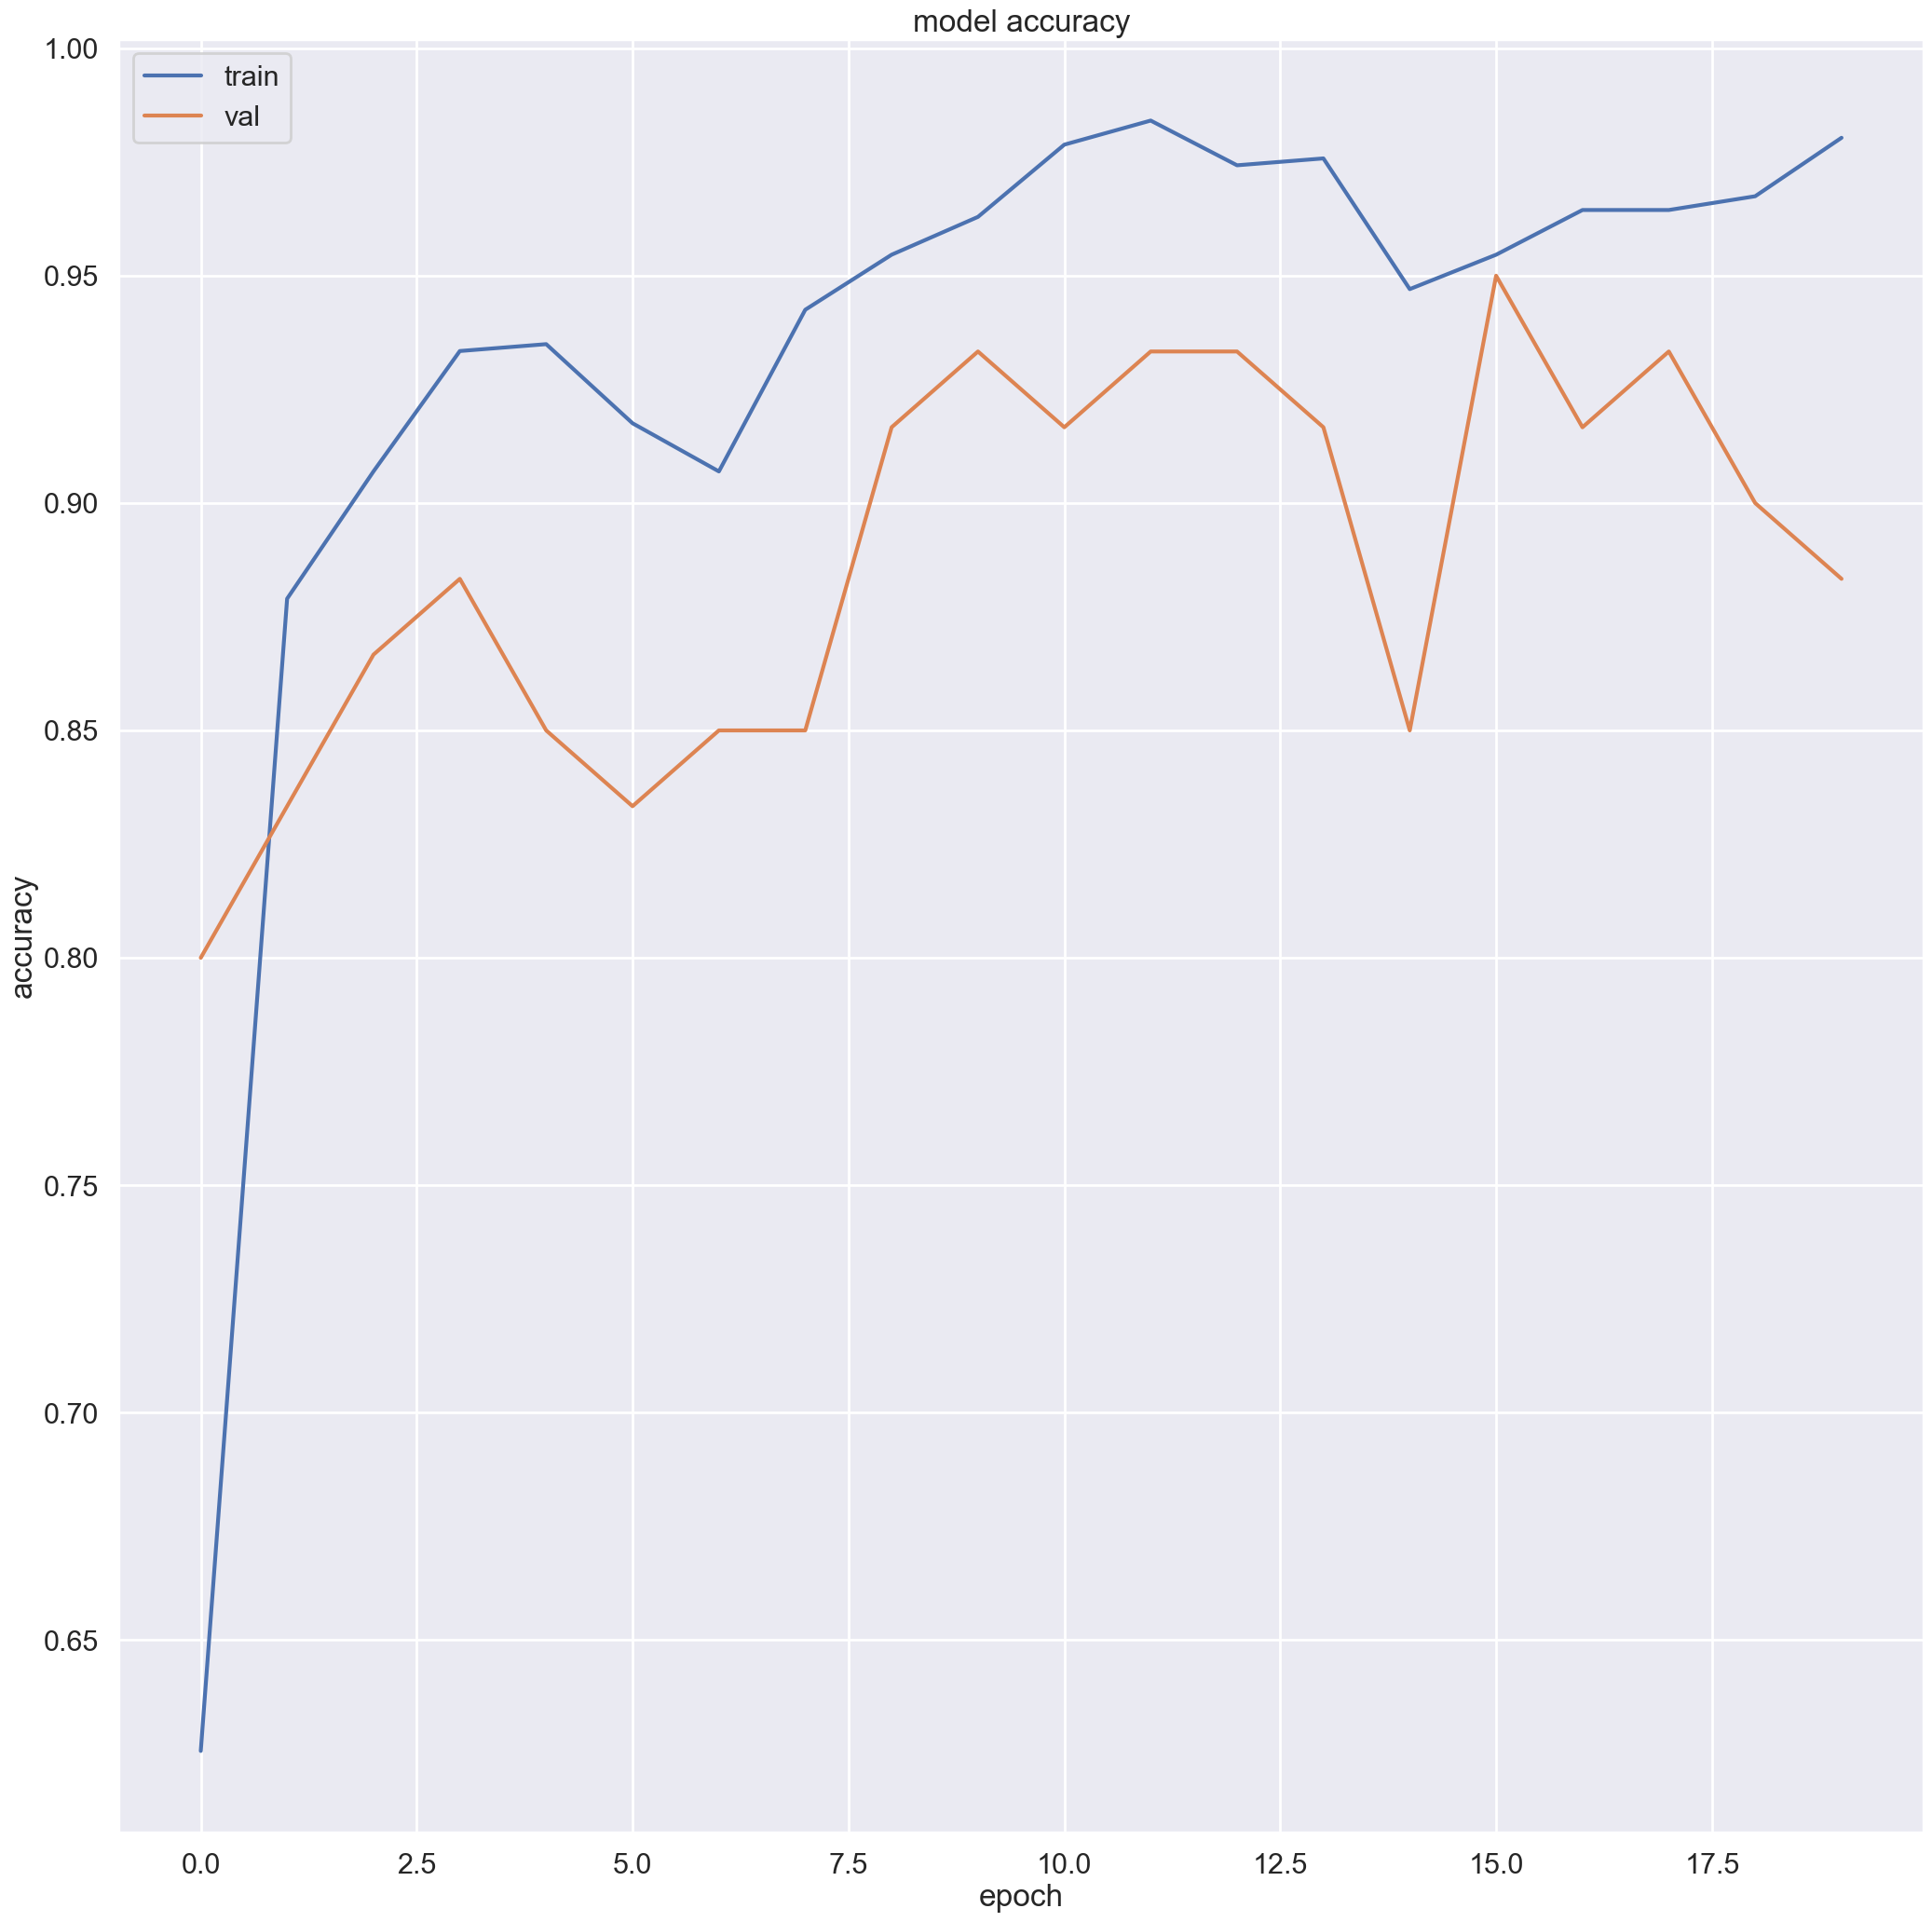

In [9]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
model.save("model.h5")

In [11]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image(r"C:\Users\gayae\Downloads\New folder\Test\Test\Rust\91f6c89ade1cd60a.jpg")

In [12]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


array([3.6201861e-08, 2.1647525e-12, 1.0000000e+00], dtype=float32)

In [13]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [14]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust


In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf

# Define modified Mish activation function
def mish_modified(x):
    return x * (1 - tf.math.tanh(tf.math.softplus(x)))

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Additional hidden layers with Mish Modified activation
model.add(Conv2D(128, (3, 3), activation=mish_modified))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation=mish_modified))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation=mish_modified))
model.add(Dense(3, activation='softmax'))

model.summary()


C:\Users\gayae\Music\anaconda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 223, 223, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       2,359,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,747,971 (10.48 MB)

 Trainable params: 2,747,971 (10.48 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:


history = model.fit(train_generator,
                    batch_size=64,  # Change the batch size here
                    epochs=20,
                    validation_data=validation_generator,
                    validation_batch_size=64
                    )


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 552s 11s/step - accuracy: 0.4396 - loss: 1.0318 - val_accuracy: 0.6500 - val_loss: 0.7138
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 521s 11s/step - accuracy: 0.7803 - loss: 0.5469 - val_accuracy: 0.7333 - val_loss: 0.5207
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 750s 16s/step - accuracy: 0.8137 - loss: 0.4844 - val_accuracy: 0.8667 - val_loss: 0.2692
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 522s 10s/step - accuracy: 0.8963 - loss: 0.2800 - val_accuracy: 0.8833 - val_loss: 0.3946
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 4724s 113s/step - accuracy: 0.9177 - loss: 0.2844 - val_accuracy: 0.8167 - val_loss: 0.4441
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 523s 10s/step - accuracy: 0.9178 - loss: 0.2422 - val_accuracy: 0.9000 - val_loss: 0.2417
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 523s 10s/step - accuracy: 0.9337 - loss: 0.1795 - val_accuracy: 0.8667 - val_loss: 0.3001
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 522s 10s/step - accuracy: 0.9251 - loss: 0.2254 - val_accuracy: 

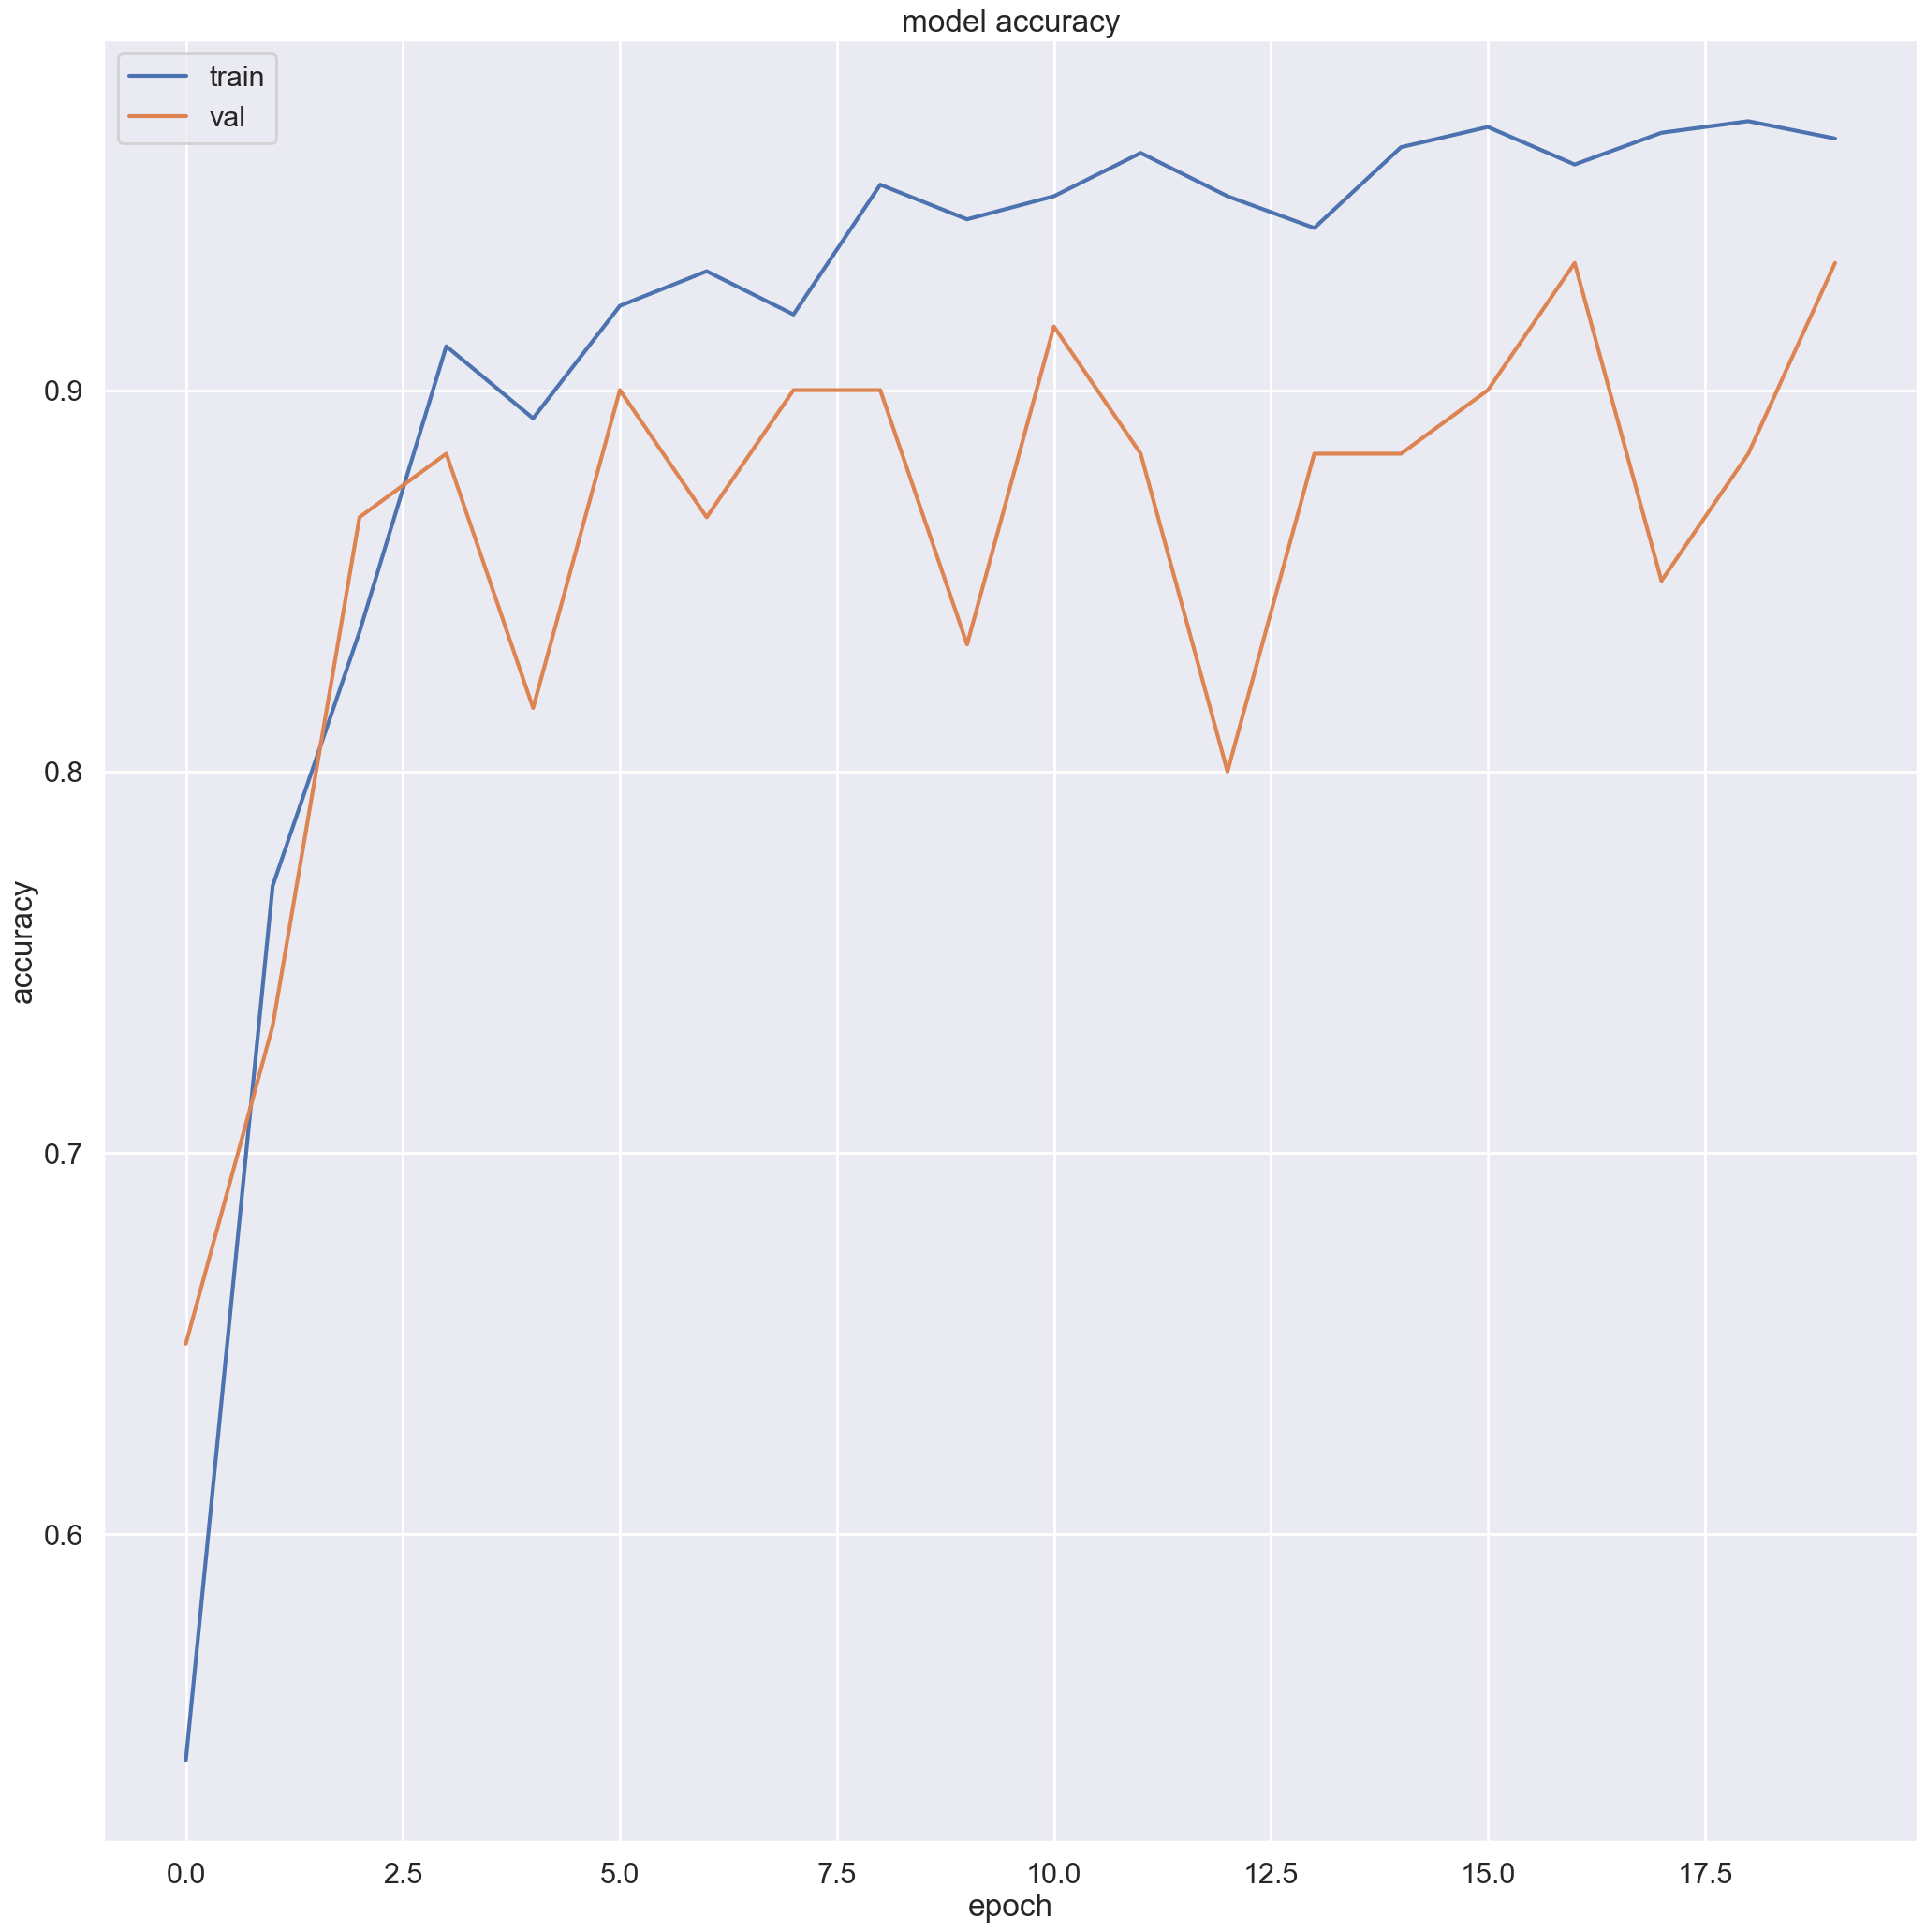

In [18]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
model.save("model.h5")

In [20]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image(r"C:\Users\gayae\Downloads\New folder\Test\Test\Rust\91f6c89ade1cd60a.jpg")

In [21]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


array([0.01316774, 0.00646422, 0.980368  ], dtype=float32)

In [22]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [23]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust
